<a href="https://colab.research.google.com/github/Samikshab99/Unsupervised-ML-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Online Retail Customer Segmentation </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

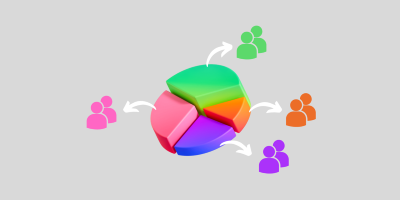

## **Customer segmentation:**
Customer segmentation is the process of separating your customers into groups based on certain traits they share.

Segmentation offers a simple way of organizing and managing your company’s relationships with your customers. This process also makes it easy to tailor and personalize your marketing, service, and sales efforts to the needs of specific groups. This helps boost customer loyalty and conversions.The division is based on customers having similar:

* Needs (i.e., so a single whole product can satisfy them)

* Buying characteristics (i.e., responses to messaging, marketing channels, and sales channels, that a single go-to-market approach can be used to sell to them competitively and economically)



## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides. 

---



# Lets begin with rituals !

## **Importing libraries**

In [82]:
#Importing Libraries
import pandas as pd
import numpy as np
import datetime
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

## **IMPORTING DATASET:**

In [83]:
# Mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
# Loading the csv file containing data
retail_df=pd.read_excel('/content/drive/MyDrive/Unsupervised ML/Online Retail.xlsx')

In [86]:
# As we have the data now, lets see what's in it.
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## Looks like we need to read all column names try to figure out what data they are really storing.

In [87]:
retail_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [88]:
# Basic
retail_df.shape

(541909, 8)

In [89]:
# Thats a lot of data
retail_df.size

4335272

In [90]:
# This is supposed to show first 5 rows of dataframe.
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [91]:
retail_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


## **PREPROCESSING:**

In [92]:
# Copy the Dataframe
df =retail_df.copy()

In [93]:
#getting count,mean, min,max std etc
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [94]:
# Stats from Data Frame in case od Object Datatype
df.describe(include=['O'])


,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


## **HANDELING NULL VALUES:**


In [95]:
# Drop Duplicated rows of data from the DataFrame, It happened because of Human Error..!! :-p
print("Length of DataFrame with duplicate values : ", len(df))
df.drop_duplicates(inplace=True, keep='first')
print("Length of DataFrame after dropping all the duplicate values : ", len(df))


Length of DataFrame with duplicate values :  541909
Length of DataFrame after dropping all the duplicate values :  536641


In [96]:
#getting null values
df.isna().sum().sort_values(ascending=False)

CustomerID     135037
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

Above we can see null values in different variables:

CustomerID have 135037 null values.

Description have 1454 null values.

Now lets go ahead to check rest of the missing values in rest of the dataset.

In [97]:
# Creating a Definition for checking missing values.
def mdF():
    total_no = df.isnull().sum()
    missing_percentage = (df.isnull().sum()/len(df))*100
    mdF = pd.concat([total_no, missing_percentage], keys=['Missing_Values', 'Missing_Percentage'], axis=1)
    return mdF[mdF['Missing_Values'] > 1]

mdF()

,Missing_Values,Missing_Percentage
Description,1454,0.270945
CustomerID,135037,25.163377


Drop the entries where both the CustomerID and Description are null values.

In [98]:
# Drop the entries where both the CustomerID and Description are null values.
df.drop(index=df[df['CustomerID'].isna() & df['Description'].isna()].index, inplace=True)

In [99]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [100]:
#getting columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [101]:
mdF()

,Missing_Values,Missing_Percentage
CustomerID,133583,24.960061


The main task is to identify the Customer Categories, but with missing Customer ID's we cannot proceed further.

In [102]:
# Drop the null values in customer ID field
df.dropna(inplace=True)

In [103]:
#getting info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [104]:
#describing
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


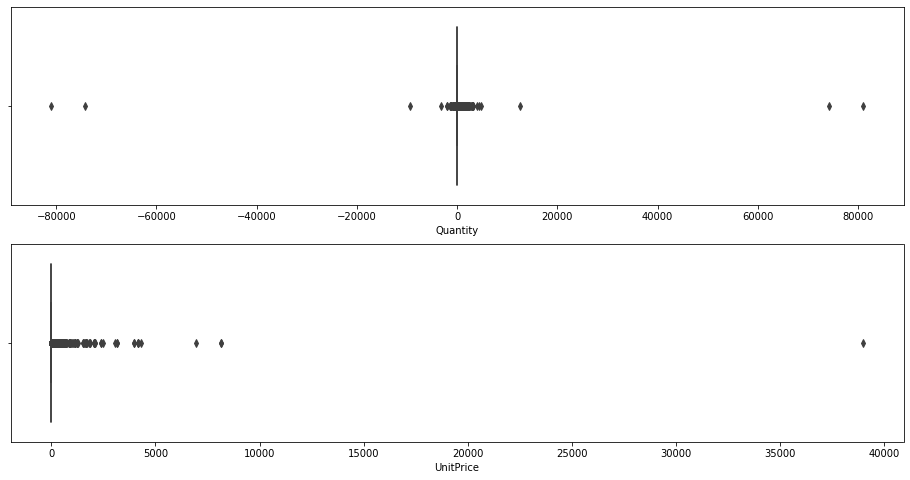

In [105]:
#plotting graph
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
sns.boxplot(df['Quantity'])
plt.subplot(2,1,2)
sns.boxplot(df['UnitPrice'])

Quantity & Unit Price should never be negative & not equals to Zero:

In [106]:
# Take the data frame where both the fields are positive in nature
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
print("Length of Dataframe is : ",len(df))

Length of Dataframe is :  392692


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


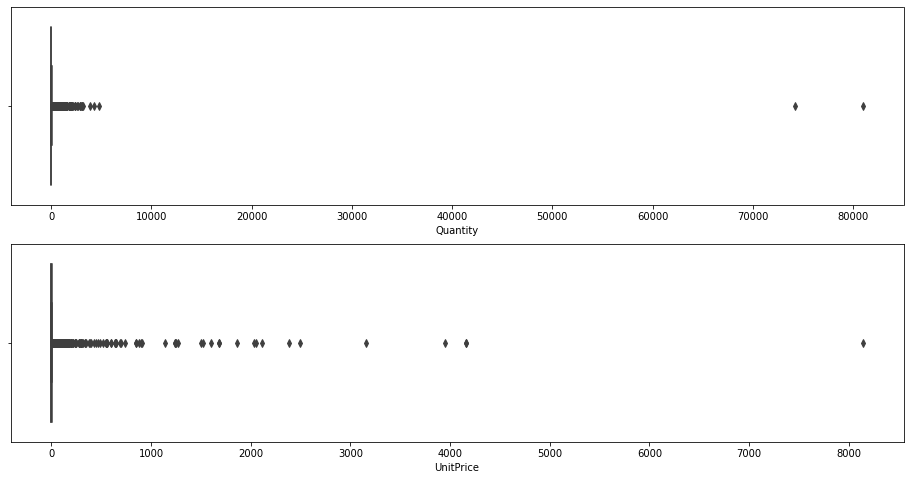

In [107]:
#plotting graph
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
sns.boxplot(df['Quantity'])
plt.subplot(2,1,2)
sns.boxplot(df['UnitPrice'])

In [108]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [109]:
# Convert the Data Type of CustomerID to Integer using Lambda Function
df['CustomerID'] = df['CustomerID'].apply(lambda x: int(x))

In [110]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [111]:
# Draw a new column with the total price paid by the customer
df['Total_Price'] = df['Quantity']*df['UnitPrice']

In [112]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [113]:
# draw different stats from the time stamps
year = df['InvoiceDate'].apply(lambda x: x.year)
month = df['InvoiceDate'].apply(lambda x: x.month)
weekday = df['InvoiceDate'].apply(lambda x: x.weekday())
time_hr = df['InvoiceDate'].apply(lambda x: x.time().hour)
minutes_hr = df['InvoiceDate'].apply(lambda x: x.time().minute)

In [114]:
#getting length
len(year), len(month), len(weekday), len(time_hr), len(minutes_hr)

(392692, 392692, 392692, 392692, 392692)

In [115]:
#converting month no. to month name
monthDict={1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June',
           7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
month = month.map(monthDict)

In [116]:
#converting no. to week day
day = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
weekday = weekday.map(day)

In [117]:
#creating function to seperate morning afternoon and evening
def Period(x):
    if 6 <= x < 12:
        return 'Morning'
    elif 12 <= x < 16:
        return 'Afternoon'
    elif 16<= x <= 20:
        return 'Evening'

In [118]:
#converting to year month weekday and time
df['Year'] = year
df['Month'] = month
df['WeekDay'] = weekday
df['TimePeriod'] = time_hr
df['TimePeriod'] = df['TimePeriod'].apply(lambda x: Period(x))

In [119]:
#getting head
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price,Year,Month,WeekDay,TimePeriod
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,December,Wednesday,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,December,Wednesday,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,December,Wednesday,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,December,Wednesday,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,December,Wednesday,Morning


In [120]:
#getting columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Total_Price', 'Year', 'Month',
       'WeekDay', 'TimePeriod'],
      dtype='object')

In [121]:
#shifting columns 
df = df[['CustomerID', 'InvoiceNo', 'InvoiceDate', 'Year', 'Month', 'WeekDay','TimePeriod',
         'StockCode', 'Country', 'Description', 'Quantity', 'UnitPrice', 'Total_Price']]

In [122]:
#copying df
customer_df= df.copy()

In [123]:
customer_df.head()#getting head

,CustomerID,InvoiceNo,InvoiceDate,Year,Month,WeekDay,TimePeriod,StockCode,Country,Description,Quantity,UnitPrice,Total_Price
0,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30
1,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,71053,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34
2,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00
3,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34
4,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34


In [124]:
customer_df.head()#getting head

,CustomerID,InvoiceNo,InvoiceDate,Year,Month,WeekDay,TimePeriod,StockCode,Country,Description,Quantity,UnitPrice,Total_Price
0,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30
1,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,71053,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34
2,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00
3,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34
4,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34


In [125]:
customer_df.info()#getting info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   CustomerID   392692 non-null  int64         
 1   InvoiceNo    392692 non-null  object        
 2   InvoiceDate  392692 non-null  datetime64[ns]
 3   Year         392692 non-null  int64         
 4   Month        392692 non-null  object        
 5   WeekDay      392692 non-null  object        
 6   TimePeriod   392692 non-null  object        
 7   StockCode    392692 non-null  object        
 8   Country      392692 non-null  object        
 9   Description  392692 non-null  object        
 10  Quantity     392692 non-null  int64         
 11  UnitPrice    392692 non-null  float64       
 12  Total_Price  392692 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 41.9+ MB


In [126]:
customer_df.describe()#describing

,CustomerID,Year,Quantity,UnitPrice,Total_Price
count,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000
mean,15287.843865,2010.934631,13.119702,3.125914,22.631500
std,1713.539549,0.247177,180.492832,22.241836,311.099224
min,12346.000000,2010.000000,1.000000,0.001000,0.001000
25%,13955.000000,2011.000000,2.000000,1.250000,4.950000
50%,15150.000000,2011.000000,6.000000,1.950000,12.450000
75%,16791.000000,2011.000000,12.000000,3.750000,19.800000
max,18287.000000,2011.000000,80995.000000,8142.750000,168469.600000


In [127]:
customer_df.describe(include=['O'])#describing

,InvoiceNo,Month,WeekDay,TimePeriod,StockCode,Country,Description
count,392692,392692,392692,392692,392692,392692,392692
unique,18532,12,6,3,3665,37,3877
top,576339,November,Thursday,Afternoon,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
freq,542,63168,79243,231998,2023,349203,2016


## **EXPLORATORY DATA ANALYSIS (EDA):**

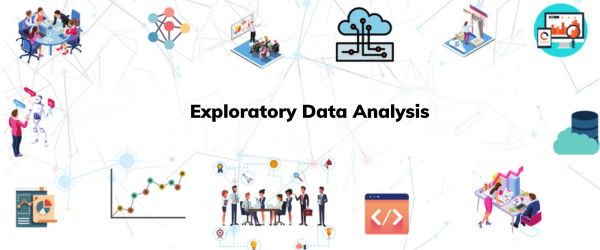

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

It is a good practice to understand the data first and try to gather as many insights from it. EDA is all about making sense of data in hand,before getting them dirty with it.

## **Top 30 Customers of our Retail Chain are:**

In [128]:
#extracting best customers using groupby
best_customers = customer_df.groupby(by='CustomerID')['Total_Price'].sum().sort_values(ascending=False)[:30]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


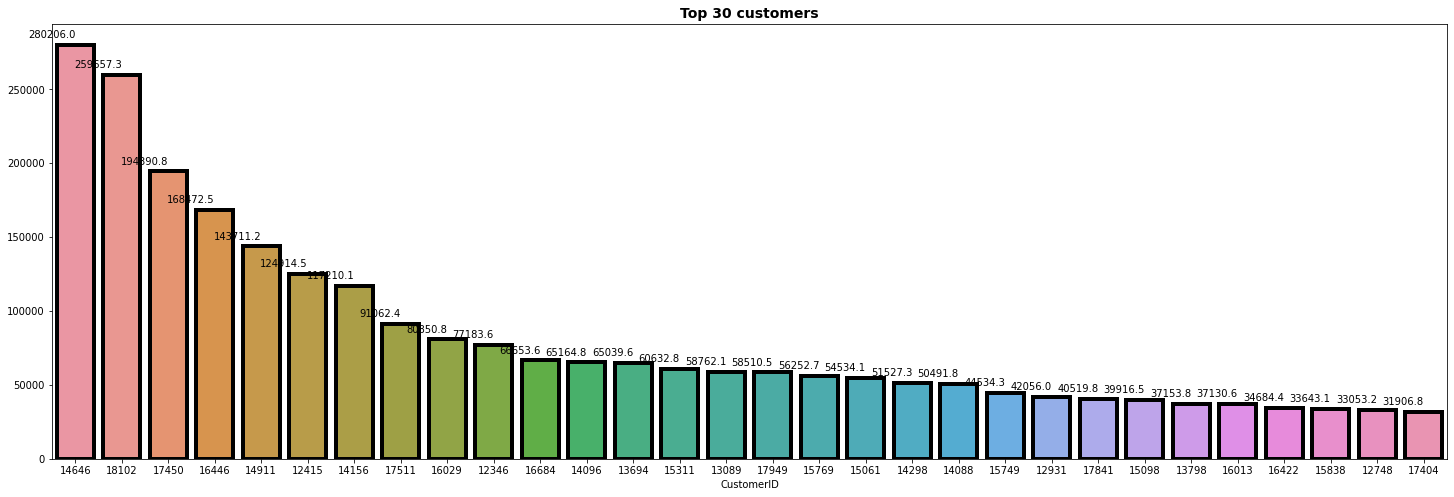

In [129]:
# Here, we plot the bar plot
plt.figure(figsize=(55,8))
plt.subplot(1,2,1)
ax=sns.barplot(best_customers.index, best_customers.values, order=best_customers.index,lw=4,
               ec='black',hatch='')
plt.title("Top 30 customers", fontsize=14, fontweight="bold")

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'right', va = 'center', xytext = (0, 10), textcoords = 'offset points')

## **Purchase Per Year:**

In [130]:
#importing library
from plotnine import*

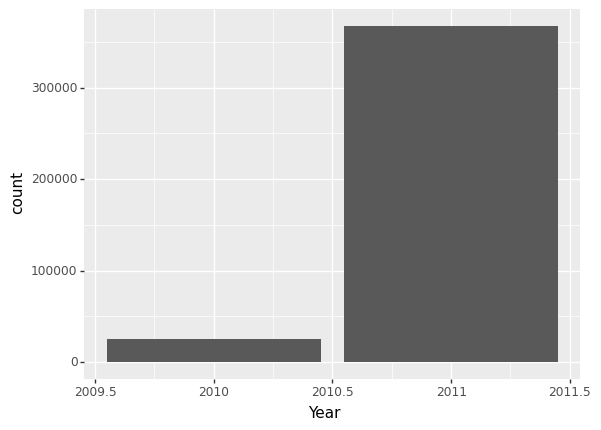

<ggplot: (8749027474877)>

In [131]:
#plotting graph
ggplot(customer_df)+ aes("Year",fill="Year")+geom_bar()

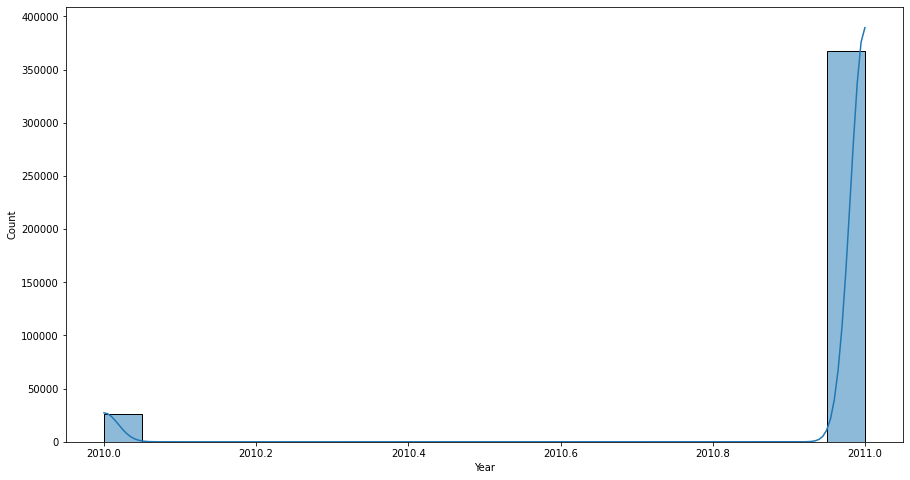

In [132]:
#plotting graph
fig, ax=plt.subplots(figsize=(15,8))
sns.histplot(data=customer_df, x="Year", kde= True,ax=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


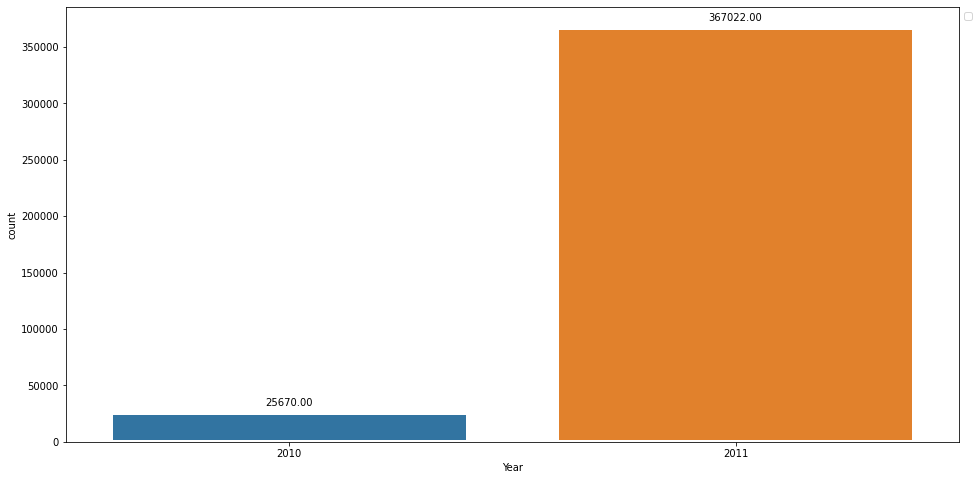

In [133]:
# Plotting the graph

plt.figure(figsize=(16,8))
ax=sns.countplot(customer_df['Year'],lw=4, ec='white')

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Placing the Legend outside
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

**OBSERVATION:**

As observed , we have data of only december month of year 2010 thats why we can see that there is huge spike in purchase in year 2011.


## **Purchase Per Month:**

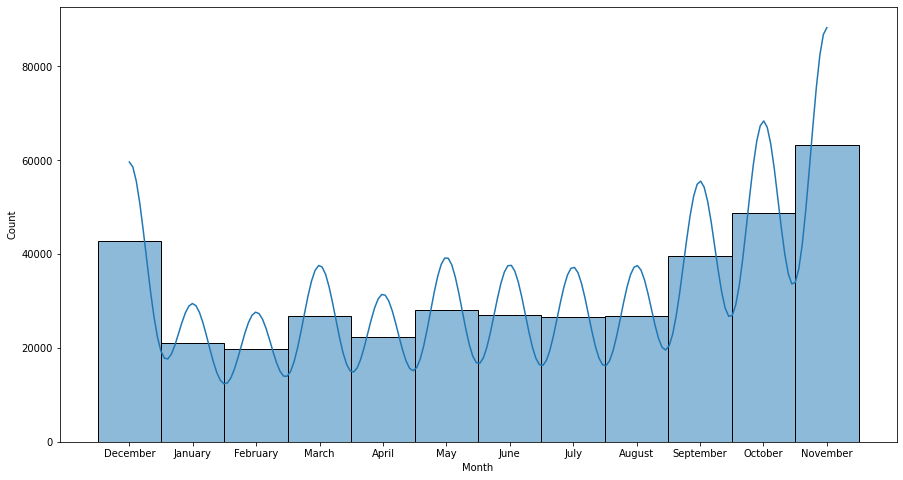

In [134]:
#plotting graph
fig, ax=plt.subplots(figsize=(15,8))
sns.histplot(data=customer_df, x="Month", kde= True,ax=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


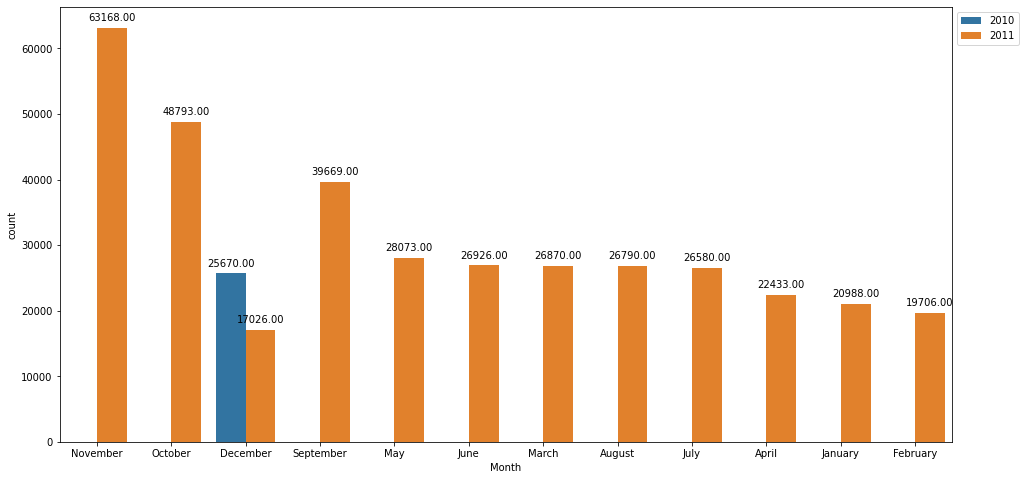

In [135]:
# Plotting the graph

plt.figure(figsize=(16,8))
ax=sns.countplot(customer_df['Month'], order=customer_df['Month'].value_counts().index, hue=customer_df['Year'],lw=4)
 
# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Placing the Legend outside
plt.legend(bbox_to_anchor=(1,1), loc="upper left")


**OBSERVATION:**

We can see that November and October month have highest number of purhase.

## **Purchase Per Weekday**


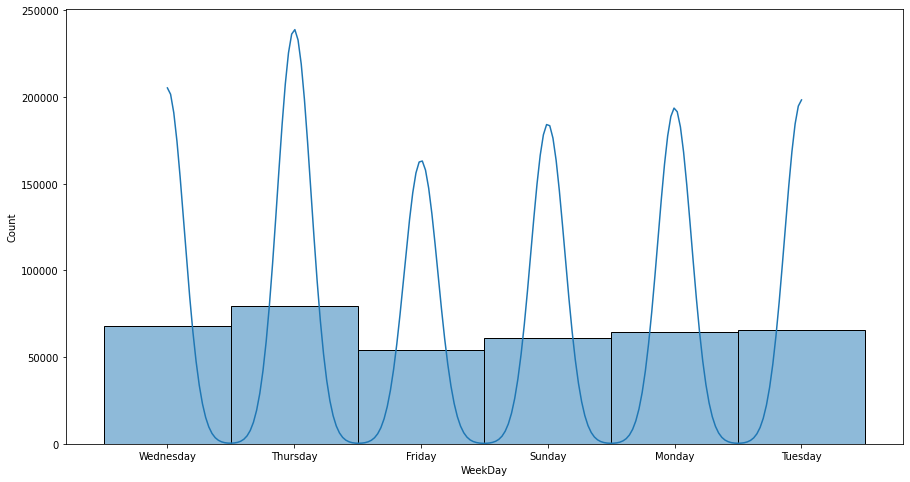

In [136]:
#plotting graph
fig, ax=plt.subplots(figsize=(15,8))
sns.histplot(data=customer_df, x="WeekDay", kde= True,ax=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


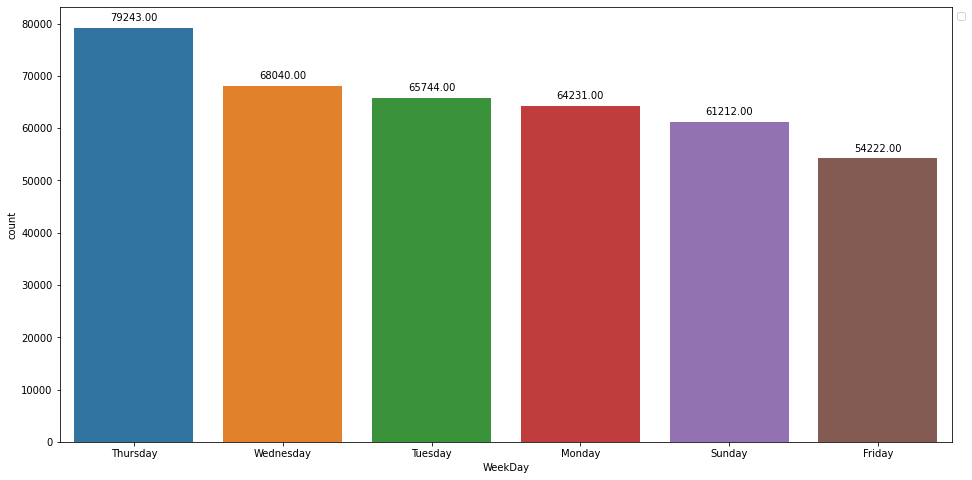

In [137]:
# Plotting the graph

plt.figure(figsize=(16,8))
ax=sns.countplot(customer_df['WeekDay'], order=customer_df['WeekDay'].value_counts().index,lw=4)

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Placing the Legend outside
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

**Observation:**

We can see that Thursday and Wednesday have the highest number of purchase.

## **Purchase Per Time Period:**

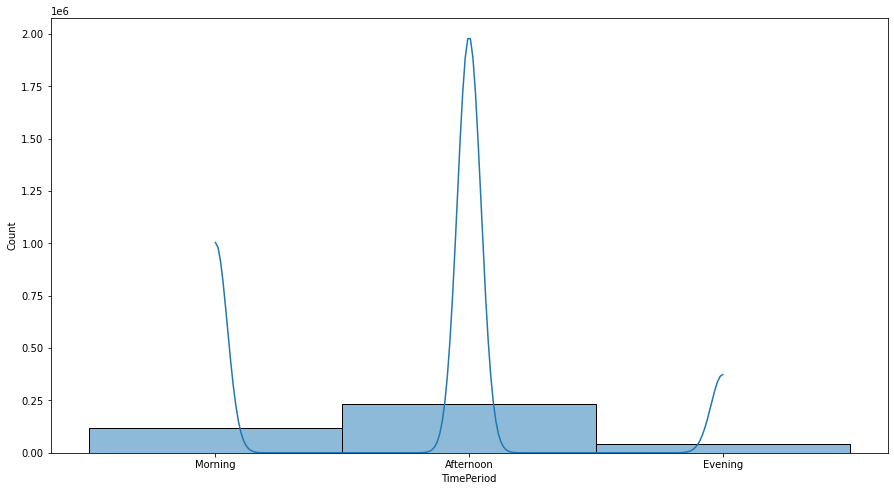

In [138]:
#plotting graph
fig, ax=plt.subplots(figsize=(15,8))
sns.histplot(data=customer_df, x="TimePeriod", kde= True,ax=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


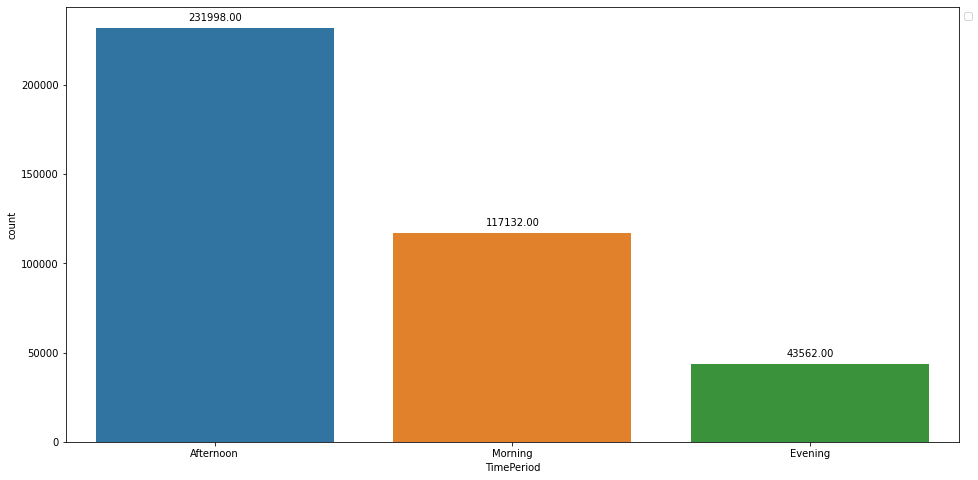

In [139]:
# Plotting the graph

plt.figure(figsize=(16,8))
ax=sns.countplot(customer_df['TimePeriod'], order=customer_df['TimePeriod'].value_counts().index,lw=4)

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Placing the Legend outside
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

**Observation:**

We can see that the most of people like to go for purchasing in afternoon time period.

---

As far as now we have observed that:

* Sales are very high in October, November & December as compared to other months.

* We have sales data of only december month from year 2010.

* The Retail Store is Closed on Saturday as per the observation.

* Maximum number of sales are happening on Tuesday, Wednesday and Thursday in ascending order respectively.

* Most of the people are  visiting the store in the afternoon as compared to morning and evening time period.

* The total number of sales in December of year 2010 is higher than December of year 2011.

* Management needs to concentrate on the decrease of sales in December month.

---


---





## **Revenue Generated in Weekdays**

In [140]:
#EXTRACTING MOST REVENUE GENERATED WEEKDAY USING GROUPBY 
weekly_sales = customer_df.groupby(by='WeekDay')['Total_Price'].sum().sort_values(ascending=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


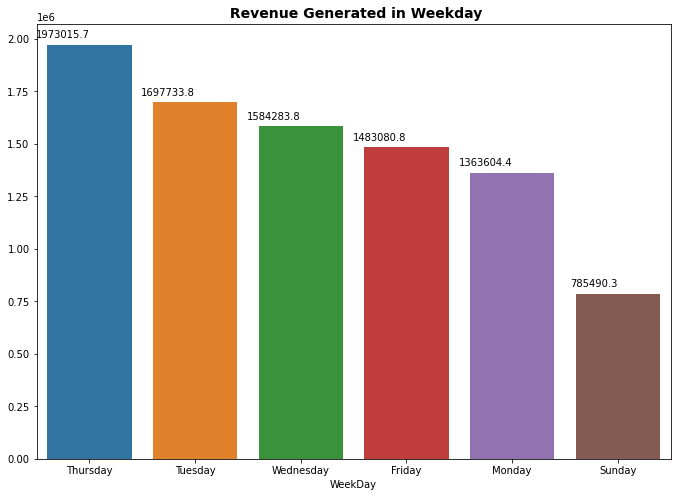

In [141]:
# Here, we plot the bar plot
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
ax=sns.barplot(weekly_sales.index, weekly_sales.values, order=weekly_sales.index)
plt.title(" Revenue Generated in Weekday", fontsize=14, fontweight="bold")

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'right', va = 'center', xytext = (0, 10), textcoords = 'offset points')

**OBSERVATION:**

* The highest Revenue was generated on Thursday.
* The Lowest Revenue was generated on Sunday.

## **Purchase Satistics:**

In [142]:
#getting purchase stas
country_sales = customer_df.groupby(by='Country')['Total_Price'].sum().sort_values(ascending=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


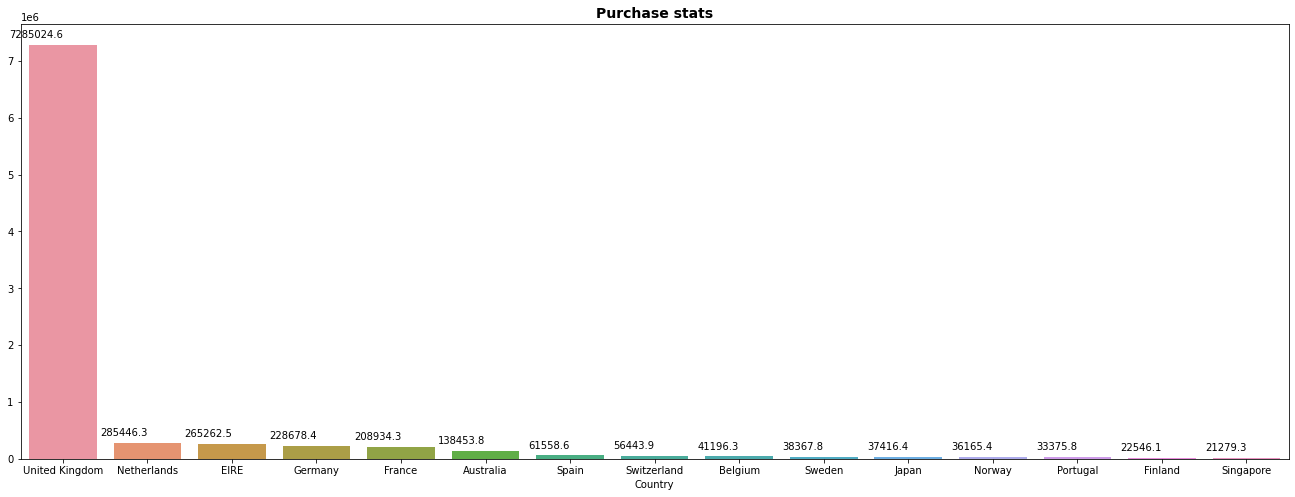

In [143]:
# Here, we plot the bar plot
plt.figure(figsize=(50,8))
plt.subplot(1,2,1)
ax=sns.barplot(country_sales[:15].index, country_sales[:15].values,lw=4)
plt.title("Purchase stats", fontsize=14, fontweight="bold")

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'right', va = 'center', xytext = (0, 10), textcoords = 'offset points')

**OBSERVATION:**

* It can be seen that the country which have purchased more number of items as compared to other countries is United Kingdom and the country which have purchased least items is Singapore.

## **Top 10 Purchasing Countries:**

In [144]:
#extracting top purchasing country
sales = df.groupby(by='Country').agg({'Quantity' : 'sum', 
                                      'Total_Price' : 'sum'}).sort_values(by=['Quantity'], ascending=False)

In [145]:
#top 10
sales=sales[:10]
sales=sales.reset_index()


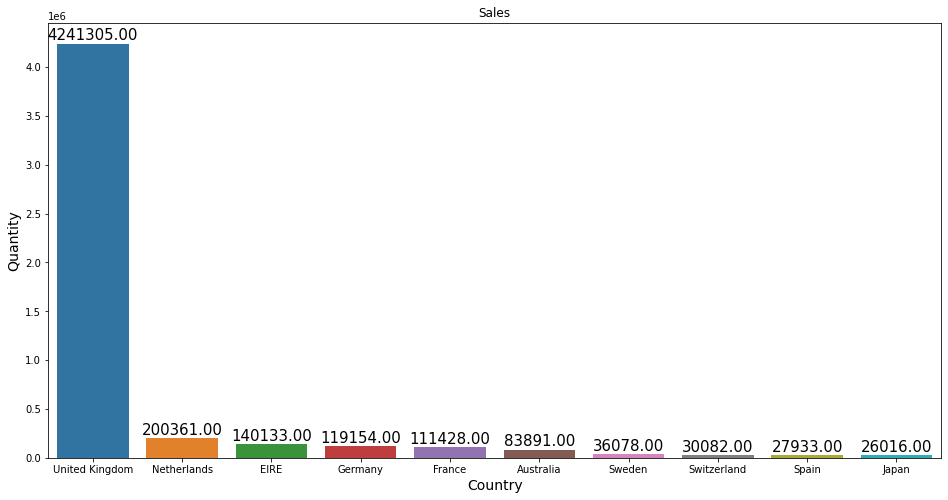

In [146]:
# Defining the plot size
plt.figure(figsize=(16, 8))
 
# Defining the values for x-axis, y-axis
# and from which dataframe the values are to be picked
plots = sns.barplot(x="Country", y="Quantity", data=sales)
 
# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
 
# Setting the label for x-axis
plt.xlabel("Country", size=14)
 
# Setting the label for y-axis
plt.ylabel("Quantity", size=14)
 
# Setting the title for the graph
plt.title("Sales")
 
# Finally showing the plot
plt.show()


**Observation:**

We can see that United Kingdom is at top in the list of top 10 purchasing countries and Japan is at the bottom in the list.

## **Top Sold Products :**

In [147]:
#extracting product sale
product_sales = customer_df.groupby(by='Description')['Quantity'].sum().sort_values(ascending=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


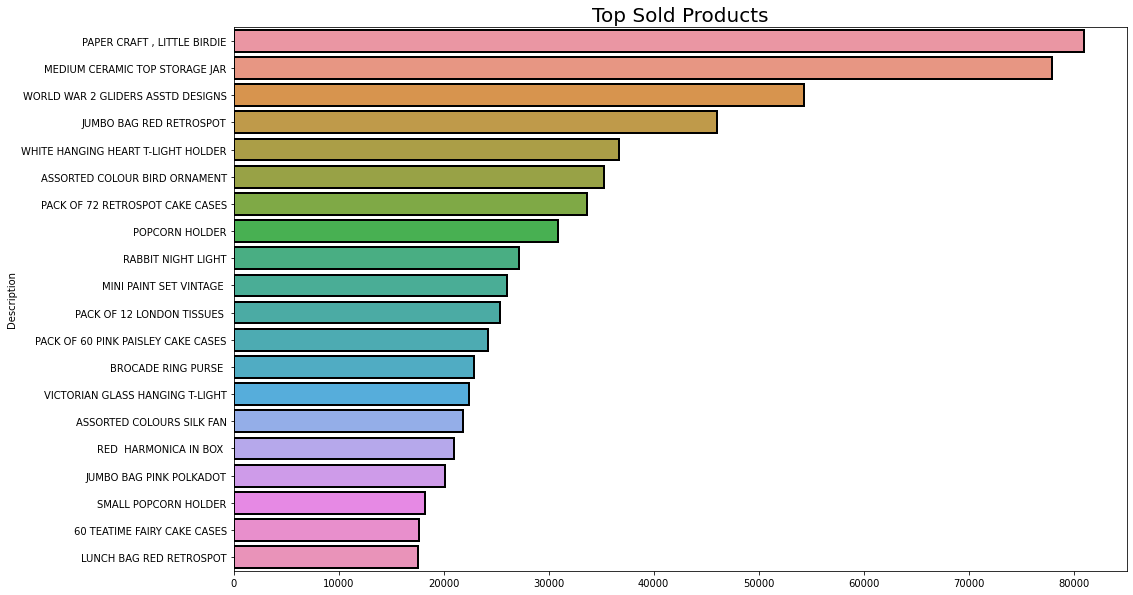

In [148]:
#plotting graph
plt.figure(figsize=(16,10))
plt.title("Top Sold Products", fontsize=20)
sns.barplot(product_sales[:20].values, product_sales[:20].index,ec='black',linewidth=2)

**OBSERVATION:**

It can be observed that most sold product is "Paper craft, little birdie" and least sold product is "Lunch Bag Red Retrospot".

## **Top Revenue Generated Products:**

In [149]:
#extracting most revenue generated product
product_revenue = customer_df.groupby(by='Description')['Total_Price'].sum().sort_values(ascending=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


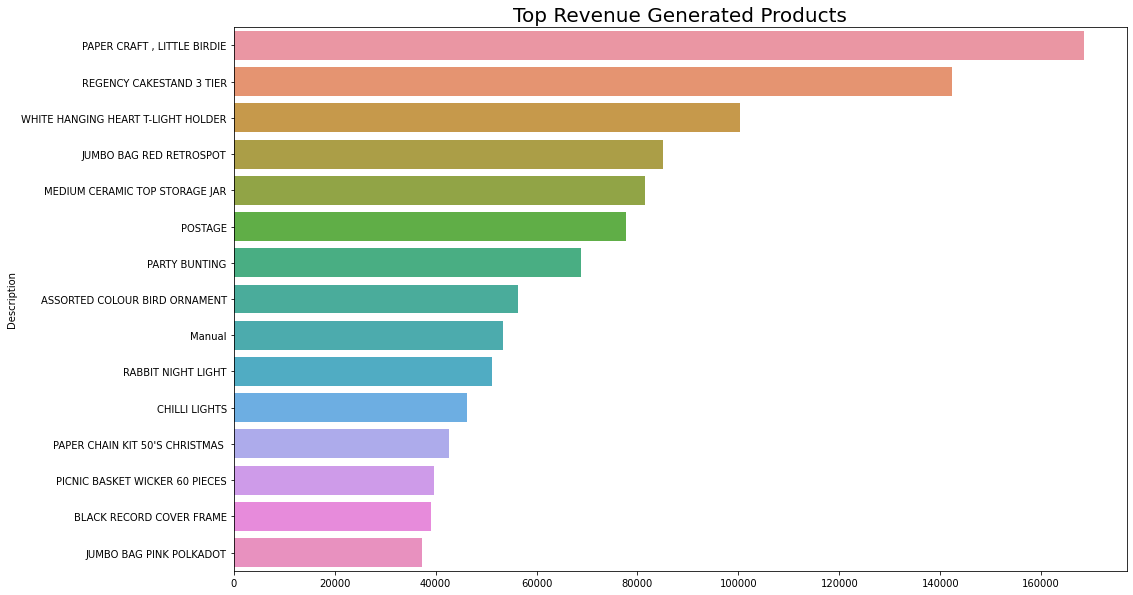

In [150]:
#plotting graph
plt.figure(figsize=(16,10))
plt.title("Top Revenue Generated Products", fontsize=20)
sns.barplot(product_revenue[:15].values, product_revenue[:15].index,lw=4)

**OBSERVATION:**

It can be seen that most revenue generated product is "Paper craft, little birdie" and least revenue generated product is "Jumbo Bag Pink Polkadot".

## **Customer Statisistics:** 

Customer loyalty is the act of choosing one company's products and services consistently over their competitors. When a customer is loyal to one company, they aren't easily swayed by price or availability. They would rather pay more and ensure the same quality service & product they know

In [151]:
#extracting loyal customers
loyal_customers = customer_df.groupby(by='CustomerID')['Quantity'].sum().sort_values(ascending=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


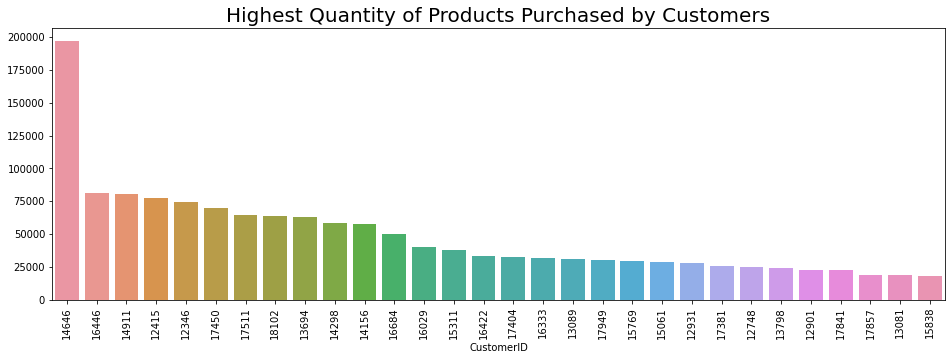

In [152]:
#plotting graph
plt.figure(figsize=(16,5))
plt.xticks(rotation=90)
plt.title("Highest Quantity of Products Purchased by Customers", fontsize=20)
sns.barplot(loyal_customers[:30].index, loyal_customers[:30].values, order=loyal_customers[:30].index,lw=4)

**Observation:**

The barplot shows the Customer ID of people who have purchased highest quantity of products.



In [153]:
#describing
loyal_customers.describe()

count      4338.000000
mean       1187.644537
std        5043.619654
min           1.000000
25%         159.000000
50%         378.000000
75%         989.750000
max      196915.000000
Name: Quantity, dtype: float64

Since we don't have the purchase stats of our customers with the other companies, Let us seggregate them into 3 Categories based on thier purchases as Bronze, Silver and Gold.

In [154]:
#creating function to divide customers into bronze silver gold category
def Loyalty(x):
    if x<500:
        return "Bronze"
    elif 500 <= x < 1000:
        return "Silver"
    elif x >= 1000:
        return "Gold"


In [155]:
#applying function
loyal_customers_categories = loyal_customers.apply(lambda x: Loyalty(x))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


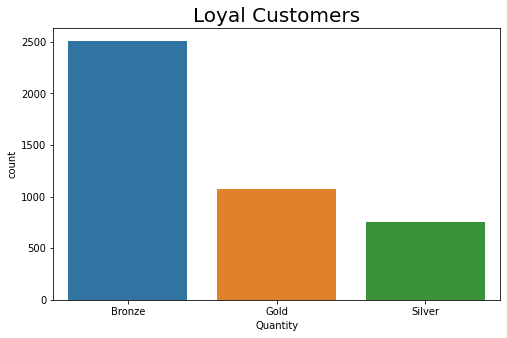

In [156]:
#plotting graph
plt.figure(figsize=(8,5))
plt.title("Loyal Customers", fontsize=20)
sns.countplot(loyal_customers_categories, order=loyal_customers_categories.value_counts().index)

**Observation:**

We can see that we have more number of bronze customers.

## **Which customers who buy often but spend less?**

In [157]:
#daily customers
daily_customers = customer_df.groupby(by='CustomerID').agg(
    {"InvoiceNo" : "nunique","Total_Price" : 'sum'}).sort_values(by=['InvoiceNo', 'Total_Price'], ascending=[False, True])

# Considering 20,000 is less payment from Daily Customers
daily_customers = daily_customers[daily_customers['Total_Price'] < 20000]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


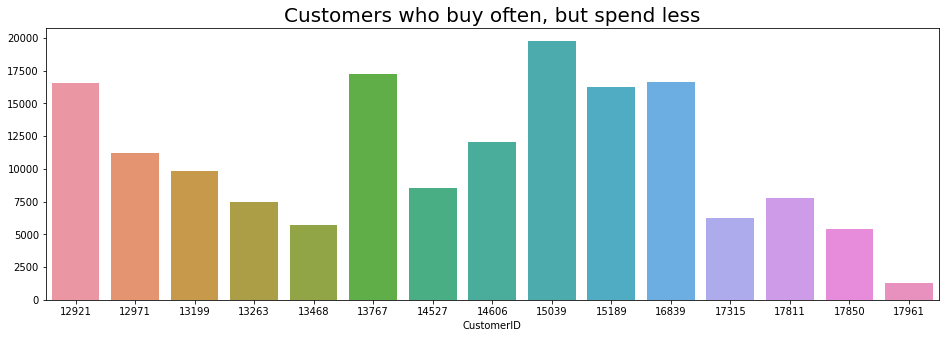

In [158]:
#plotting graph
plt.figure(figsize=(16,5))
plt.title("Customers who buy often, but spend less", fontsize = 20)
sns.barplot(daily_customers['Total_Price'][:15].index,
            daily_customers['Total_Price'][:15].values,lw=4)

## **How many customers we have lost?**

In [159]:
#extracting lost customers
lost_customers = customer_df[customer_df['Year'] == 2011].groupby(by='Month')['CustomerID'].nunique()

lost_customers


Month
April         856
August        935
December      615
February      758
January       741
July          949
June          991
March         974
May          1056
November     1664
October      1364
September    1266
Name: CustomerID, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


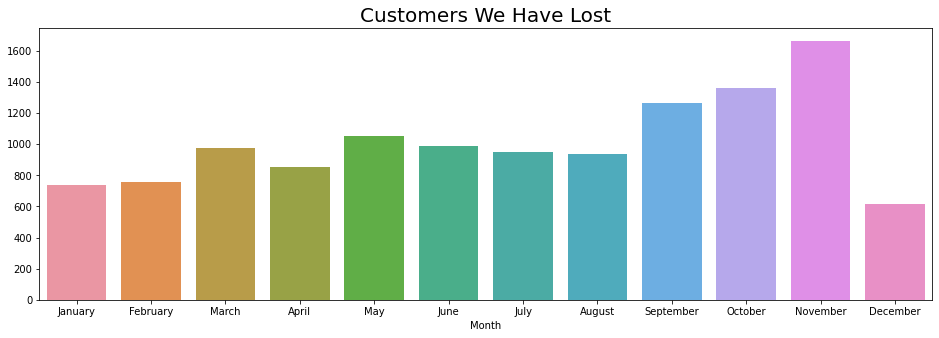

In [160]:
#plotting graph
plt.figure(figsize=(16,5))
plt.title('Customers We Have Lost', fontsize = 20)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.barplot(lost_customers.index, lost_customers.values, order=months,lw=4)

**Observation:**

It can be observed from above that we have lost the maximum customers in the month of November or we can also say that we have lost maximum number of customers in the end of the year.

## **Correlation Analysis:**

Correlation analysis is a method of statistical evaluation used to study the strength of a relationship between two or more, numerically measured, continuous variables. This analysis is useful when we need to check if there are possible connections between variables.

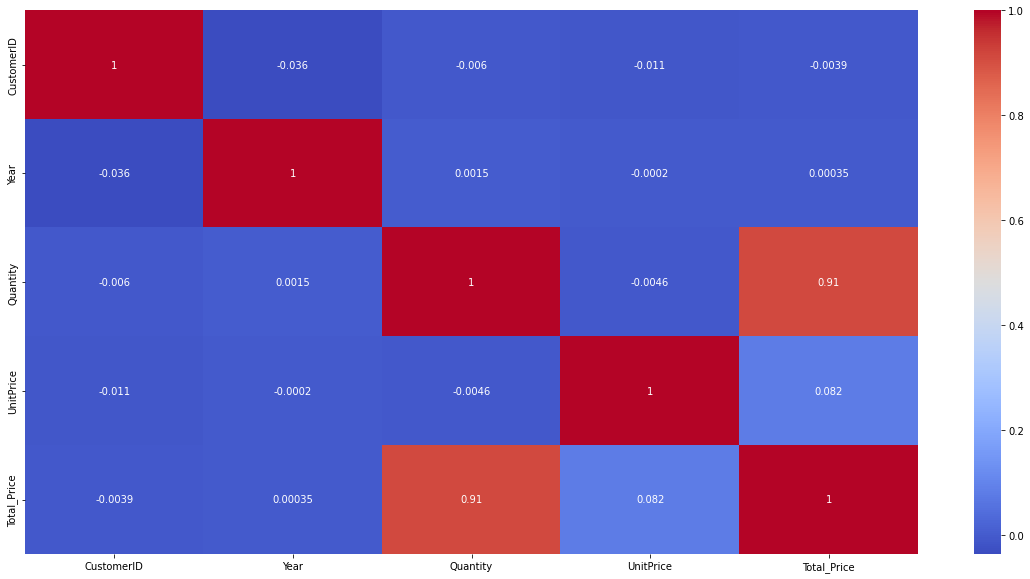

In [161]:
#finding Correlation
fig, ax = plt.subplots(figsize = ( 20 , 10 ))
correlation = customer_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
fig.savefig('Heatmap2')

## **Feature Engineering:**

**Unique item stock codes and their description**




In [162]:
#Find number of unique items in stock
print(f"Number of unique item stock codes: {len(customer_df.StockCode.unique())}")
print(f"Number of unique item descriptions: {len(customer_df.Description.unique())}")

Number of unique item stock codes: 3665
Number of unique item descriptions: 3877


**OBSERVATION**:

The count of unique stock unit ids and their descriptions should have matched but they do not. This implies some stock units might have more than one descriptions.

 Let us examine the reasons behind this data quality issue:

In [163]:
#Find out the stock units that have more than one description
dfStockDesc = customer_df.groupby(["StockCode","Description"]).count().reset_index()
dfStockDesc.StockCode.value_counts()[dfStockDesc.StockCode.value_counts()>1].reset_index().head()

,index,StockCode
0,23196,4
1,23236,4
2,23203,3
3,17107D,3
4,23535,3


In [164]:
#COPYING DATASET IN OTHER VARIABLE
dfRetail = customer_df.copy()

In [165]:
dfRetail.head(3)

,CustomerID,InvoiceNo,InvoiceDate,Year,Month,WeekDay,TimePeriod,StockCode,Country,Description,Quantity,UnitPrice,Total_Price
0,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30
1,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,71053,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34
2,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00


**Filter UK only data:**

We noticed in the exploratory data analysis phase that majority of the transactions belonged to UK, so it makes sense to consider only this country data for maximum impact